In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams["font.family"] = "serif"
csfont = {'fontname':'Times New Roman'}
plt.rcParams['mathtext.fontset']='dejavuserif'

In [3]:
input_data_path = "/Users/jeager/Documents/PhD_work/ekman_ocean/input_data/ProCb"
output_data_path = "/Users/jeager/Documents/PhD_work/ekman_ocean/output_data/ProCb"
plot_path = "/Users/jeager/Documents/PhD_work/ekman_ocean/plots"

In [4]:
lats_file = "lats.dat"
lons_file = "lons.dat"

T_init_file = "surface_temperature.dat"
# T_init_file = "T_surf_10000_days_no_transport_equilibrium.dat"

os.chdir(input_data_path)
lats_index = np.loadtxt(lats_file, dtype=int, delimiter="\t",usecols=[0])
lats_data = np.loadtxt(lats_file, delimiter="\t",usecols=[1])
lons_index = np.loadtxt(lons_file, dtype=int, delimiter="\t",usecols=[0])
lons_data = np.loadtxt(lons_file, delimiter="\t",usecols=[1])


In [7]:
T_data = {}
T_day_data = {}
T_night_data = {}

layers = [
    'surf',
    'deep',
]
os.chdir(output_data_path)
for layer in layers:
    T_file = "T_"+layer+"_20000_days.dat"
    T_data[layer] = np.loadtxt(T_file, delimiter="\t",usecols=lons_index)
    split_T = np.split(T_data[layer],4,axis=1)
    day_T_data = np.concatenate((split_T[1],split_T[2]), axis=1)
    night_T_data = np.concatenate((split_T[3],split_T[0]), axis=1)
    T_data[layer] = np.mean(T_data[layer],axis=1)
    T_day_data[layer] = np.mean(day_T_data,axis=1)
    T_night_data[layer] = np.mean(night_T_data,axis=1)

os.chdir(input_data_path)
T_init_data = np.loadtxt(T_init_file, delimiter="\t",usecols=lons_index)
split_T = np.split(T_init_data,4,axis=1)
T_init_data = np.mean(T_init_data,axis=1)
day_T_data = np.concatenate((split_T[1],split_T[2]), axis=1)
night_T_data = np.concatenate((split_T[3],split_T[0]), axis=1)

T_init_day_data = np.mean(day_T_data,axis=1)
T_init_night_data = np.mean(night_T_data,axis=1)

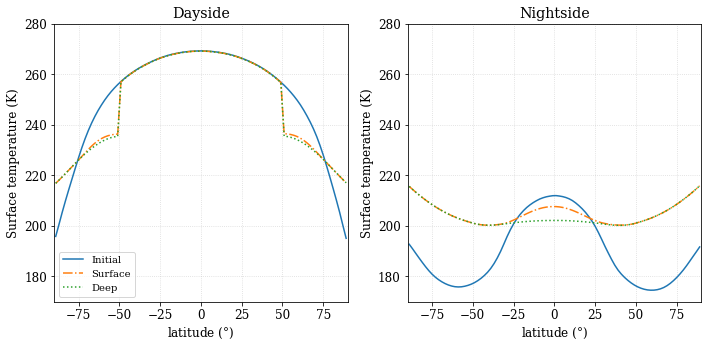

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)

ax.plot(lats_data,T_init_day_data,'C0-',label='Initial')
ax.plot(lats_data,T_day_data['surf'],'C1-.',label='Surface')
ax.plot(lats_data,T_day_data['deep'],'C2:',label='Deep')

ax.set_title("Dayside")
ax.set_xlim(-90.,90.)
ax.set_ylabel('Surface temperature (K)')
ax.set_xlabel(r'latitude ($\degree$)')
ax.grid(linestyle=':', alpha=0.5)
ax.legend(loc='best', fontsize=10)
ax.set_ylim([170,280])
 
ax = fig.add_subplot(1,2,2)

ax.plot(lats_data,T_init_night_data,'C0-',label='Initial')
ax.plot(lats_data,T_night_data['surf'],'C1-.',label='Surface')
ax.plot(lats_data,T_night_data['deep'],'C2:',label='Deep')

ax.set_title("Nightside")
ax.set_xlim(-90.,90.)
ax.set_ylabel('Surface temperature (K)')
ax.set_xlabel(r'latitude ($\degree$)')
ax.grid(linestyle=':', alpha=0.5)
#ax.legend(loc='best', fontsize=14)
ax.set_ylim([170,280])

plt.tight_layout()
plt.show()
os.chdir(plot_path)
fig.savefig('zonal_average_day_night_temperature_surf.pdf')